In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
L = 5.0
k = 0.02
S = 0.0
TA = 200
TB = 1000

In [3]:
N = 4
h = L / (N+1)

In [4]:
T = np.zeros(N+2)
b = np.zeros(N)
A = np.zeros((N,N)) 
#Tamaño del vector--num de elementos que tiene (N)
#Matriz A

In [5]:
#imprementar r, b y las temperaturas
r = k / h**2
b[:] = S / r
T[0] = TA
T[-1] = TB
b[0] += TA
b[-1] += TB

In [6]:
T

array([ 200.,    0.,    0.,    0.,    0., 1000.])

In [7]:
#matriz

In [8]:
A[0,0] = 2
A[0,1] = -1
for i in range(1,N-1):
    A[i,i] = 2 
    A[i,i+1] = -1
    A[i,i-1] = -1
A[-1,-2] = -1    #posicion - numero de color rojo en la foto
A[-1,-1] = 2

In [9]:
A

array([[ 2., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  2.]])

In [10]:
T[1:N+1] = np.linalg.solve(A,b)    #resulve el sistema lineal y genera un vector 4

In [11]:
T

array([ 200.,  360.,  520.,  680.,  840., 1000.])

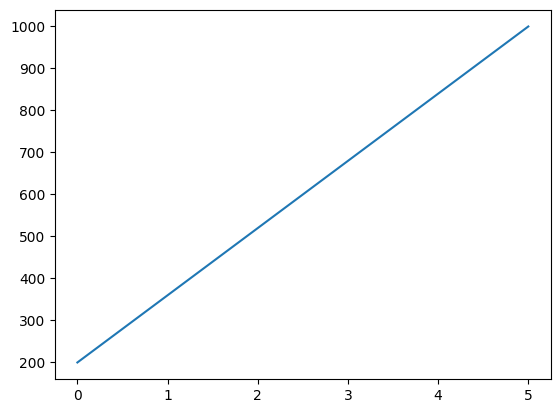

In [12]:
plt.plot(T)

Colocar el código en una sola celda para poder cambiar las variables de una manera más práctica

In [13]:
def conduccion_1d(k, S, L, TA, TB, N):   #para documentar nuestros codigos
    """
    Parameters        
    ----------  
    L: float
    L es la longitud 
    
    S: float
    es la fuente.
    
    TA: float
    es la condición de frontera a la izquierda. 
    
    TB: float 
    es la condición de frontera a la derecha.
    
    N: int
    es el numero de nodos internos (grados de libertad).
    
    Return
    -----
    al final esta función dibuja la solución.
    
#    L = 5.0
#    k = 0.02
#    S = 1.0
#    TA = 200      ##condiciones iniciales dadas por nosotros, pero estos valores se van cambiando en la siguiente celda
#    TB = 1000

#    N = 4
    """ 
    h = L / (N+1)
    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = k / h**2
    b[:] = S / r
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    A[0,0] = 2
    A[0,1] = -1
    for i in range(1,N-1):
        A[i,i] = 2 
        A[i,i+1] = -1
        A[i,i-1] = -1
    A[-1,-2] = -1    #posicion
    A[-1,-1] = 2

    T[1:N+1] = np.linalg.solve(A,b)

    plt.plot(T, 'o-')
    plt.show()

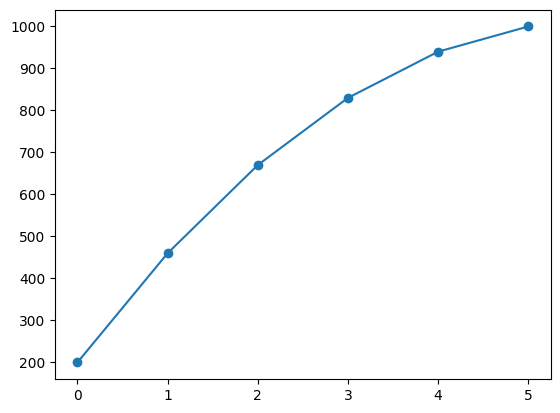

In [14]:
conduccion_1d(0.02, 1.0, 5.0, 200, 1000, 4)     ##al cambiar un valor del parentesis lo resuelve con los valores que le demos 
                                                # a las variables 

In [15]:
import ipywidgets as widgets

In [16]:
w = widgets. interactive(conduccion_1d,
                        k = widgets.fixed(0.02),
                        S = widgets.FloatSlider(max=1.0, min=0.0, value=0, step=0.2),
                        L = widgets.fixed(5.0), 
                        TA = widgets.fixed(200),
                        TB = widgets.fixed(1000),
                        N = widgets.IntSlider(max=10, min=4, value=4))

In [17]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…